# Prediction of House Prices

## 0. Introduction

My attempt at the following Kaggle competition: "House Prices - Advanced Regression Techniques", which can be found <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview" >here</a>.

This notebook includes:<br>
>[**1.0** Data Exploration](#section_1)<br>
&emsp;[**1.1** Feature Overview](#section_1_1)<br>
&emsp;[**1.2** Null Data](#section_1_2)<br>
&emsp;[**1.3** Analysis of Target Feature](#section_1_3)<br>
[**2.0** Feature Engineering](#section_2)<br>
[**3.0** Model](#section_3)

In [382]:
# Imports

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("pastel")

import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [344]:
# Functions

def display_missing(df, threshold=0):
    print('{}({} entries)'.format(df.name, df.shape[0]))
    print('Displaying features with >{}% entries missing\n'.format(threshold*100))
    for col in df.columns.tolist():
        if df[col].isnull().sum() > df.shape[0]*threshold:
            print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
def find_missing(df, threshold):
    missing_cols = []
    for col in df.columns.tolist():
        if df[col].isnull().sum() > df.shape[0]*threshold:
            missing_cols.append(col)
    return missing_cols

def print_columns(df):
    print("\n{} Columns in {}:".format(df.shape[1], df.name))
    for col in df.columns.tolist():
        print(col)
    print("\n")
    
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def split_df(df, index):
    return df.loc[:index], all_data.loc[index+1:].drop(['SalePrice'], axis=1)

def sum_unique(data):
    sum_dict = {'Null': data.isnull().sum()}
    for i in range(len(data)):
        if pd.isna(data[i]):
            pass
        else:
            counter = 1
            for key in sum_dict:
                if key == data[i]:
                    sum_dict[key] += 1
                    counter = 0
            if counter == 1:
                sum_dict[data[i]] = 1
    return sum_dict    

In [384]:
# Read in the data, store training and testing dataframes in a list

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.name = 'training data'
test_data.name = 'test data'
dfs = [train_data, test_data]

<a id="section_1"></a>

## 1.0 Data Exploration

There are `79` features in this dataset, along with the `Id` and target feature: `SalePrice`.

The shape of the sets and features are:

In [385]:
for df in dfs:
    print('{} entries, {} features in {}'.format(df.shape[0], df.shape[1], df.name))

1460 entries, 81 features in training data
1459 entries, 80 features in test data


<a id="section_1_1"></a>

### 1.1 Feature Overview

All features are briefly described here:

<ul>
    <li><code>SalePrice</code> - the property's sale price in dollars. This is the target variable.</li>
    <li><code>MSSubClass</code>: The building class</li>
    <li><code>MSZoning</code>: The general zoning classification</li>
    <li><code>LotFrontage</code>: Linear feet of street connected to property</li>
    <li><code>LotArea</code>: Lot size in square feet</li>
    <li><code>Street</code>: Type of road access</li>
    <li><code>Alley</code>: Type of alley access</li>
    <li><code>LotShape</code>: General shape of property</li>
    <li><code>LandContour</code>: Flatness of the property</li>
    <li><code>Utilities</code>: Type of utilities available</li>
    <li><code>LotConfig</code>: Lot configuration</li>
    <li><code>LandSlope</code>: Slope of property</li>
    <li><code>Neighborhood</code>: Physical locations within Ames city limits</li>
    <li><code>Condition1</code>: Proximity to main road or railroad</li>
    <li><code>Condition2</code>: Proximity to main road or railroad (if a second is present)</li>
    <li><code>BldgType</code>: Type of dwelling</li>
    <li><code>HouseStyle</code>: Style of dwelling</li>
    <li><code>OverallQual</code>: Overall material and finish quality</li>
    <li><code>OverallCond</code>: Overall condition rating</li>
    <li><code>YearBuilt</code>: Original construction date</li>
    <li><code>YearRemodAdd</code>: Remodel date</li>
    <li><code>RoofStyle</code>: Type of roof</li>
    <li><code>RoofMatl</code>: Roof material</li>
    <li><code>Exterior1st</code>: Exterior covering on house</li>
    <li><code>Exterior2nd</code>: Exterior covering on house (if more than one material)</li>
    <li><code>MasVnrType</code>: Masonry veneer type</li>
    <li><code>MasVnrArea</code>: Masonry veneer area in square feet</li>
    <li><code>ExterQual</code>: Exterior material quality</li>
    <li><code>ExterCond</code>: Present condition of the material on the exterior</li>
    <li><code>Foundation</code>: Type of foundation</li>
    <li><code>BsmtQual</code>: Height of the basement</li>
    <li><code>BsmtCond</code>: General condition of the basement</li>
    <li><code>BsmtExposure</code>: Walkout or garden level basement walls</li>
    <li><code>BsmtFinType1</code>: Quality of basement finished area</li>
    <li><code>BsmtFinSF1</code>: Type 1 finished square feet</li>
    <li><code>BsmtFinType2</code>: Quality of second finished area (if present)</li>
    <li><code>BsmtFinSF2</code>: Type 2 finished square feet</li>
    <li><code>BsmtUnfSF</code>: Unfinished square feet of basement area</li>
    <li><code>TotalBsmtSF</code>: Total square feet of basement area</li>
    <li><code>Heating</code>: Type of heating</li>
    <li><code>HeatingQC</code>: Heating quality and condition</li>
    <li><code>CentralAir</code>: Central air conditioning</li>
    <li><code>Electrical</code>: Electrical system</li>
    <li><code>1stFlrSF</code>: First Floor square feet</li>
    <li><code>2ndFlrSF</code>: Second floor square feet</li>
    <li><code>LowQualFinSF</code>: Low quality finished square feet (all floors)</li>
    <li><code>GrLivArea</code>: Above grade (ground) living area square feet</li>
    <li><code>BsmtFullBath</code>: Basement full bathrooms</li>
    <li><code>BsmtHalfBath</code>: Basement half bathrooms</li>
    <li><code>FullBath</code>: Full bathrooms above grade</li>
    <li><code>HalfBath</code>: Half baths above grade</li>
    <li><code>Bedroom</code>: Number of bedrooms above basement level</li>
    <li><code>Kitchen</code>: Number of kitchens</li>
    <li><code>KitchenQual</code>: Kitchen quality</li>
    <li><code>TotRmsAbvGrd</code>: Total rooms above grade (does not include bathrooms)</li>
    <li><code>Functional</code>: Home functionality rating</li>
    <li><code>Fireplaces</code>: Number of fireplaces</li>
    <li><code>FireplaceQu</code>: Fireplace quality</li>
    <li><code>GarageType</code>: Garage location</li>
    <li><code>GarageYrBlt</code>: Year garage was built</li>
    <li><code>GarageFinish</code>: Interior finish of the garage</li>
    <li><code>GarageCars</code>: Size of garage in car capacity</li>
    <li><code>GarageArea</code>: Size of garage in square feet</li>
    <li><code>GarageQual</code>: Garage quality</li>
    <li><code>GarageCond</code>: Garage condition</li>
    <li><code>PavedDrive</code>: Paved driveway</li>
    <li><code>WoodDeckSF</code>: Wood deck area in square feet</li>
    <li><code>OpenPorchSF</code>: Open porch area in square feet</li>
    <li><code>EnclosedPorch</code>: Enclosed porch area in square feet</li>
    <li><code>3SsnPorch</code>: Three season porch area in square feet</li>
    <li><code>ScreenPorch</code>: Screen porch area in square feet</li>
    <li><code>PoolArea</code>: Pool area in square feet</li>
    <li><code>PoolQC</code>: Pool quality</li>
    <li><code>Fence</code>: Fence quality</li>
    <li><code>MiscFeature</code>: Miscellaneous feature not covered in other categories</li>
    <li><code>MiscVal</code>: $Value of miscellaneous feature</li>
    <li><code>MoSold</code>: Month Sold</li>
    <li><code>YrSold</code>: Year Sold</li>
    <li><code>SaleType</code>: Type of sale</li>
    <li><code>SaleCondition</code>: Condition of sale</li>
</ul>

In [386]:
# Peak at the training data

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [387]:
# Peak at the test data

test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [388]:
# Use the pandas info() function to view the datatype of each column

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [389]:
# Split features based on datatype

quantitative = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train_data.columns if train_data.dtypes[f] == 'object']

In [390]:
# Here we can see the quantitative features

quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [352]:
# Here we can see the qualitative features

qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<a id="section_1_2"></a>

### 1.2 Null Data

As we can see there are many features with null elements recorded, these will have to filled in as best as possible for accurate results.

In [353]:
# Display which features are missing any data

for df in dfs:
    display_missing(df)

training data(1460 entries)
Displaying features with >0% entries missing

LotFrontage column missing values: 259
Alley column missing values: 1369
MasVnrType column missing values: 8
MasVnrArea column missing values: 8
BsmtQual column missing values: 37
BsmtCond column missing values: 37
BsmtExposure column missing values: 38
BsmtFinType1 column missing values: 37
BsmtFinType2 column missing values: 38
Electrical column missing values: 1
FireplaceQu column missing values: 690
GarageType column missing values: 81
GarageYrBlt column missing values: 81
GarageFinish column missing values: 81
GarageQual column missing values: 81
GarageCond column missing values: 81
PoolQC column missing values: 1453
Fence column missing values: 1179
MiscFeature column missing values: 1406


test data(1459 entries)
Displaying features with >0% entries missing

MSZoning column missing values: 4
LotFrontage column missing values: 227
Alley column missing values: 1352
Utilities column missing values: 2
Exterior

In [391]:
# Features missing greater than 80% of the data

for df in dfs:
    display_missing(df, 0.8)

training data(1460 entries)
Displaying features with >80.0% entries missing

Alley column missing values: 1369
PoolQC column missing values: 1453
Fence column missing values: 1179
MiscFeature column missing values: 1406


test data(1459 entries)
Displaying features with >80.0% entries missing

Alley column missing values: 1352
PoolQC column missing values: 1456
Fence column missing values: 1169
MiscFeature column missing values: 1408




In [392]:
#  Examine these features which are missing many entries, maybe null is the sensible default

cols_past_thresh = find_missing(train_data, 0.8)
for col in cols_past_thresh:
    print("Entries in {}".format(col))
    entries = sum_unique(train_data[col])
    print(entries)

Entries in Alley
{'Null': 1369, 'Grvl': 50, 'Pave': 41}
Entries in PoolQC
{'Null': 1453, 'Ex': 2, 'Fa': 2, 'Gd': 3}
Entries in Fence
{'Null': 1179, 'MnPrv': 157, 'GdWo': 54, 'GdPrv': 59, 'MnWw': 11}
Entries in MiscFeature
{'Null': 1406, 'Shed': 49, 'Gar2': 2, 'Othr': 2, 'TenC': 1}


In [356]:
# Combine training and test data together for filling in null values

all_data = concat_df(train_data, test_data)
all_data.name = 'All Data'

In [357]:
# These are actually qualitative features but are currently considered type int64, converting them to string

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [358]:
# Fill the following null values with sensible defaults

all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0]) # Assume 2 missing values are typical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) 
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [359]:
# The following null values indicate the property does not have a pool/fence/garage/basement

# Qualitative
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Alley', 
            'Fence', 'PoolQC', 'MiscFeature', 'FireplaceQu', 'MasVnrType']:
    all_data[col] = all_data[col].fillna('None')

# Quantitative
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [360]:
display_missing(all_data)

All Data(2919 entries)
Displaying features with >0% entries missing

SalePrice column missing values: 1459




Now all of the null values have been accounted for, the `SalePrice` values for the test set are of course yet to be predicted

<a id="section_1_3"></a>

## 1.3 Analysis of Target Feature

What distribution does `SalePrice` follow?

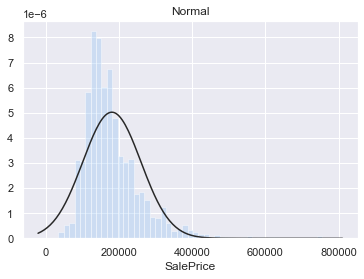

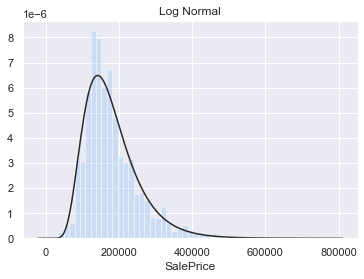

In [361]:
y = train_data['SalePrice']
plt.figure(1)
plt.title('Normal')
sns.distplot(y, kde=False, fit=scipy.stats.norm)
plt.figure(2)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=scipy.stats.lognorm)

The target feature `SalePrice` does not follow a normal distribution, however the `log-normal` distribution appears to be a good transformation. This will be completed in the next section.

<a id="section_2"></a>

## 2.0 Feature Engineering

First we will start by creating new features to account for the many properties without a basement/pool/garage etc

Next we transform the data as mentioned earlier

In [363]:
# Define new features to record whether or not there is a basement/pool/garage etc

all_data['has_pool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has_2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['has_garage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has_bsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['has_fireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [364]:
# Use pandas to get dummies

all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [365]:
# Create the submission dataframe for later

submission_df = pd.DataFrame(columns=['Id', 'SalePrice'])
submission_df['Id'] = test_data['Id']

In [366]:
# Remove the unneccesary 'Id' feature

all_data.drop(['Id'], axis=1, inplace=True)

In [367]:
# Peak at data

all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,1,0,1,1,0,0,0,1,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,1,0,1,1,0,0,1,0,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,1,0,1,1,0,0,0,1,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,1,0,1,1,0,1,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,1,0,1,1,0,0,0,1,0,0


In [368]:
all_data.shape

(2919, 338)

<a id="section_3"></a>

## 3.0 Model

We will use gradient boosting regressor and extreme gradient boosting regressor models for this prediction.

In [369]:
# Split into training and testing data

train_data, test_data = split_df(all_data, 1459)
train_data.name = 'Training Set'
test_data.name = 'Test Set'
dfs = [train_data, test_data]

In [370]:
# Transform 'SalePrice'

train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

In [371]:
# Split data into training & testing, X & y

y_train = train_data["SalePrice"]
train_data = train_data.drop(['SalePrice'], axis=1)
X_train = StandardScaler().fit_transform(train_data)
X_test = StandardScaler().fit_transform(test_data)

In [372]:
# Define gbr model

gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.05, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber')            

In [373]:
# Define xgb model

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [374]:
# Fit models

gbr_model = gbr.fit(X_train, y_train)
xgb_model = xgboost.fit(X_train, y_train)

[20:46:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [375]:
# Predict & blend models together

y_pred_xgb = xgb_model.predict(X_test)
y_pred_gbr = gbr_model.predict(X_test)
final_y_pred = (y_pred_xgb + y_pred_gbr)*0.5

In [394]:
# Final prediction & saving in .csv

submission_df['SalePrice'] = np.floor(np.expm1(final_y_pred))
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df

,Id,SalePrice
0,1461,125340.0
1,1462,166977.0
2,1463,190162.0
3,1464,202626.0
4,1465,179487.0
...,...,...
1454,2915,83355.0
1455,2916,83850.0
1456,2917,168685.0
1457,2918,115457.0
